# Redesign

Visuals from https://en.wikipedia.org/wiki/2008_financial_crisis 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Example 1 

<img src="Leverage_ratios.png" style="width:60%; height:80%">

In [3]:
# data values estimated from graph
data_dict = {
    "Years": [2003 + i for i in range(5)],
    "Bear Stearns": [27.5, 27.6, 26, 28, 32.5],
    "Goldman Sachs": [18, 20, 24, 22.5, 25.1],
    "Lehman Brothers": [22.5, 23, 23.5, 25.5, 29.5],
    "Merril Lynch": [16, 18, 17, 21, 31],
    "Morgan Stanley": [23, 26, 29.5, 31, 32.5]
}

df = pd.DataFrame(data_dict)
df

,Years,Bear Stearns,Goldman Sachs,Lehman Brothers,Merril Lynch,Morgan Stanley
0,2003,27.5,18.0,22.5,16,23.0
1,2004,27.6,20.0,23.0,18,26.0
2,2005,26.0,24.0,23.5,17,29.5
3,2006,28.0,22.5,25.5,21,31.0
4,2007,32.5,25.1,29.5,31,32.5


<Axes: xlabel='Years'>

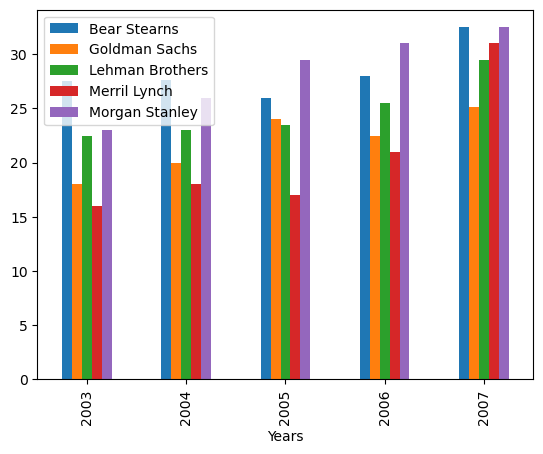

In [13]:
# initial bar chart
banks = ["Bear Stearns", "Goldman Sachs", "Lehman Brothers", "Merril Lynch", "Morgan Stanley"]

df.plot(x = "Years", y = banks, kind = "bar")



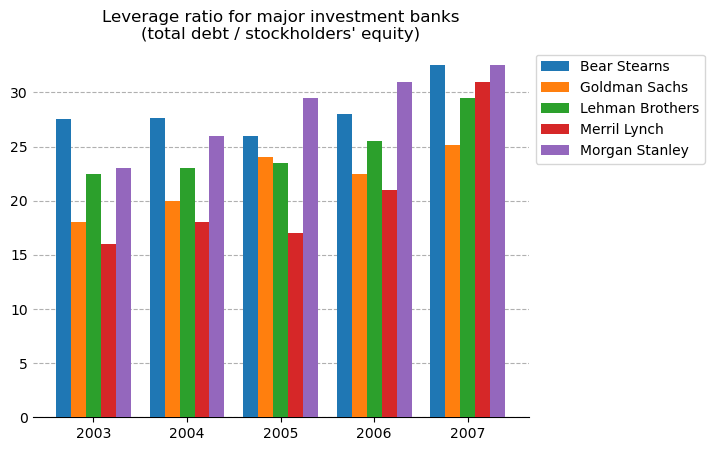

In [42]:
# some extra customization

ax = df.plot(x = "Years", y = banks, kind = "bar", width=0.8, rot = 0, zorder = 10)
ax.grid(axis = "y", linestyle="--")
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.spines[["left", "right", "top"]].set_visible(False)
ax.tick_params(axis="y", length =0)
ax.set_xlabel("")
ax.set_title("Leverage ratio for major investment banks\n(total debt / stockholders' equity)")

plt.show()

<Axes: xlabel='Years'>

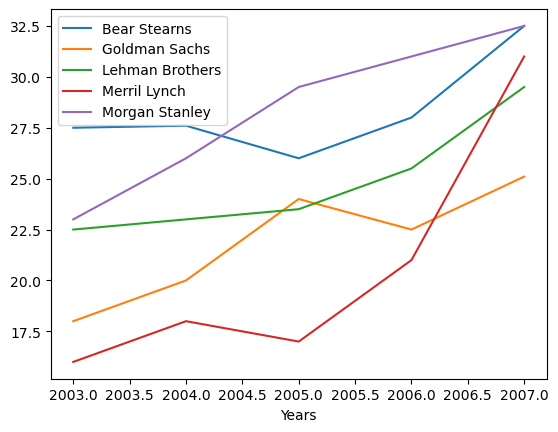

In [37]:
# Version 2, as a line chart
# initial plot

df.plot(x = "Years", y = banks, kind = "line")


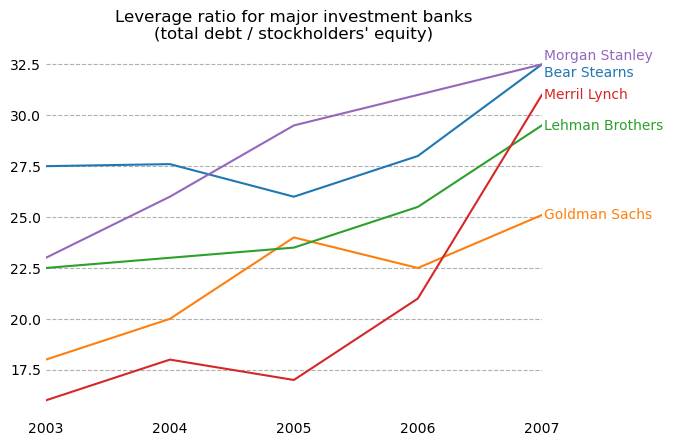

In [54]:
# with some extra customization

ax = df.plot(x = "Years", y = banks, kind = "line", legend=False)
ax.grid(axis = "y", linestyle="--")
# ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis="both", length =0)
ax.set_xticks(range(2003, 2008))
ax.set_xlabel("")
ax.set_xlim(2003, 2007)

ax.set_title("Leverage ratio for major investment banks\n(total debt / stockholders' equity)")

color_map = plt.get_cmap("tab10")
x_val = 2007.02
for i in range(5):
    cur_bank = banks[i]
    end_val = df[cur_bank].iloc[-1]
    if cur_bank == "Bear Stearns":
        ax.text(x_val, end_val - 0.4, cur_bank, color = color_map(i / 10), va="center")
    elif cur_bank == "Morgan Stanley":
        ax.text(x_val, end_val + 0.4, cur_bank, color = color_map(i / 10), va="center")        
    else:
        ax.text(x_val, end_val, cur_bank, color = color_map(i / 10), va="center")
    
    

plt.show()

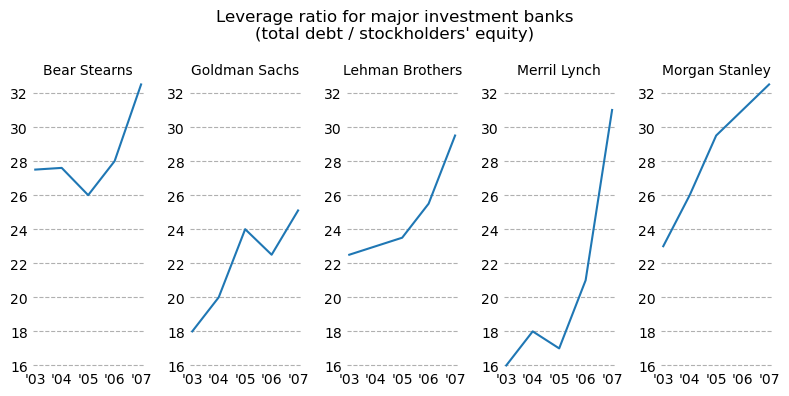

In [71]:
# Version 3 -- cycle chart 

fig, axs = plt.subplots(1, 5, figsize=(8, 4))

for i in range(5):
    df.plot(x = "Years", y = banks[i], kind="line", ax=axs[i], legend=False)
    axs[i].set_ylim(15.9, 32.6)
    axs[i].set_title(banks[i], fontsize=10)
    axs[i].grid(axis = "y", linestyle="--")
    axs[i].spines[["left", "right", "top", "bottom"]].set_visible(False)
    axs[i].tick_params(axis="both", length =0)
    axs[i].set_xticks(range(2003, 2008))
    axs[i].set_xticklabels([f"'0{j}" for j in range(3, 8)])
    axs[i].set_xlabel("")
    axs[i].set_xlim(2002.9, 2007.1)
    
plt.suptitle("Leverage ratio for major investment banks\n(total debt / stockholders' equity)")

plt.tight_layout()
plt.show()
    


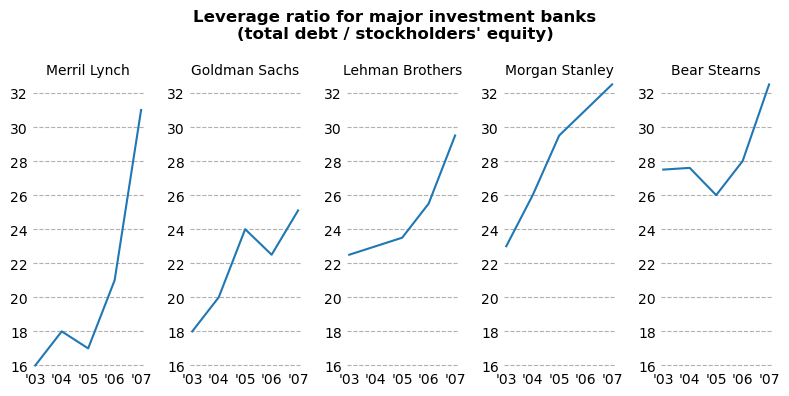

In [73]:
# Sort by low to high (from starting point)
banks = ["Merril Lynch", "Goldman Sachs", "Lehman Brothers", "Morgan Stanley", "Bear Stearns"]

fig, axs = plt.subplots(1, 5, figsize=(8, 4))

for i in range(5):
    df.plot(x = "Years", y = banks[i], kind="line", ax=axs[i], legend=False)
    axs[i].set_ylim(15.9, 32.6)
    axs[i].set_title(banks[i], fontsize=10)
    axs[i].grid(axis = "y", linestyle="--")
    axs[i].spines[["left", "right", "top", "bottom"]].set_visible(False)
    axs[i].tick_params(axis="both", length =0)
    axs[i].set_xticks(range(2003, 2008))
    axs[i].set_xticklabels([f"'0{j}" for j in range(3, 8)])
    axs[i].set_xlabel("")
    axs[i].set_xlim(2002.9, 2007.1)
    
plt.suptitle("Leverage ratio for major investment banks\n(total debt / stockholders' equity)", fontweight="bold")

plt.tight_layout()
plt.show()
    


### Example 2

<img src="housing_costs.png">


Retreive the zillow data from https://www.zillow.com/research/data/ 
* Choose home values (all homes), priced by state
* I also removed a few extraneous columns

In [85]:
zillow_df = pd.read_csv("zillow_prices.csv", index_col = "RegionName")

zillow_df.head()

,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,...,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025
RegionName,,,,,,,,,,,,,,,,,,,,,
California,189538.649055,190175.745028,191035.980599,192903.295525,195073.767800,197415.701148,199888.950005,202471.152400,205059.347149,207513.795514,...,772252.156668,774747.997749,776763.511671,778549.581659,780868.292649,782474.567100,784265.278695,786076.828180,786243.058929,784840.235403
Texas,111074.412064,111134.772769,111164.048656,111309.347481,111403.445279,111508.951818,111578.285938,111783.403510,112052.384917,112340.603665,...,302495.255875,302263.917200,301704.024700,301289.455138,301030.794740,300773.325358,300405.131241,300133.817700,299959.354201,299786.562012
Florida,106204.092383,106434.140333,106713.004305,107279.863034,107891.159088,108514.878015,109141.562979,109779.809482,110441.356522,111116.692811,...,394769.167000,393988.974277,392940.248975,391931.691530,391081.831576,390139.983991,388947.105379,387859.956804,386921.810200,385850.719984
New York,150300.747977,150835.966282,151351.200212,152459.328332,153605.844815,154845.546199,155960.033343,156935.577492,157802.442152,158731.607021,...,462242.725332,464917.104100,467417.485623,470476.928604,473305.258133,475694.546900,477503.822057,479237.261104,480352.590600,481516.978809
Pennsylvania,96347.123046,96553.202246,96746.861337,97141.509138,97546.911245,97963.554935,98406.004840,98828.371176,99258.722893,99671.445993,...,260012.391867,260882.464985,261214.299238,261460.031172,261840.110676,262570.470702,263442.027285,264609.249382,265656.195971,266551.323663


In [86]:
zt= zillow_df.T

zt.head()

RegionName,California,Texas,Florida,New York,Pennsylvania,Illinois,Ohio,Georgia,North Carolina,Michigan,...,Maine,Rhode Island,Montana,Delaware,South Dakota,North Dakota,Alaska,District of Columbia,Vermont,Wyoming
1/31/2000,189538.649055,111074.412064,106204.092383,150300.747977,96347.123046,125120.638297,102718.330530,122687.420059,126579.137185,112706.988205,...,103870.416242,128887.912975,NaN,144346.547692,105431.376812,NaN,135030.833930,162713.215794,110752.770803,NaN
2/29/2000,190175.745028,111134.772769,106434.140333,150835.966282,96553.202246,125220.910848,102781.100748,122966.021974,126771.710980,112769.064523,...,104215.995022,129474.084175,NaN,144571.117793,105207.369967,NaN,135184.200430,163245.415537,110938.223442,NaN
3/31/2000,191035.980599,111164.048656,106713.004305,151351.200212,96746.861337,125437.654465,102876.295111,123287.482056,126970.058122,112996.330199,...,104524.552742,130089.660357,NaN,144850.727782,104893.888963,NaN,135337.486721,164000.552095,111229.470374,NaN
4/30/2000,192903.295525,111309.347481,107279.863034,152459.328332,97141.509138,125947.540967,103156.218728,123964.296632,127400.308107,113449.042532,...,105204.323165,131305.938444,NaN,145490.189493,104471.350190,NaN,135517.255711,165619.720259,111801.753419,NaN
5/31/2000,195073.767800,111403.445279,107891.159088,153605.844815,97546.911245,126552.537239,103583.032634,124710.796151,127879.630499,114116.661098,...,105844.670429,132517.904784,NaN,146219.524036,104295.561714,NaN,135787.883842,167416.697285,112460.794219,NaN


In [87]:
zt["California"]

1/31/2000     189538.649055
2/29/2000     190175.745028
3/31/2000     191035.980599
4/30/2000     192903.295525
5/31/2000     195073.767800
                  ...      
10/31/2024    782474.567100
11/30/2024    784265.278695
12/31/2024    786076.828180
1/31/2025     786243.058929
2/28/2025     784840.235403
Name: California, Length: 302, dtype: float64

<Axes: >

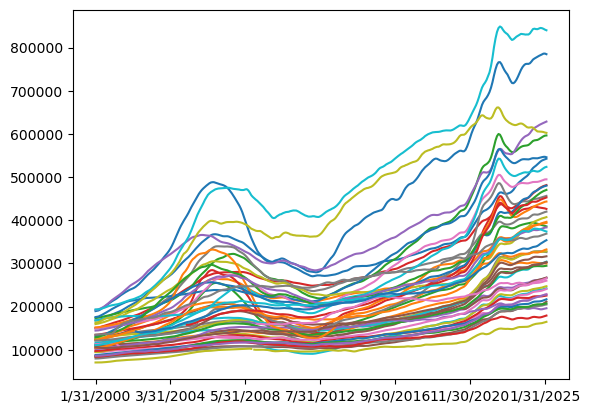

In [89]:
# Initial visual -- the spaghetti chart

zt.plot(legend=False)

<Axes: >

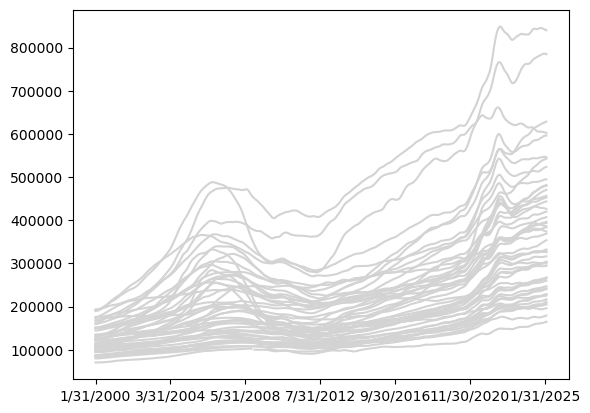

In [90]:
# Start with gray

zt.plot(legend=False, color="lightgray")


In [91]:
zt.tail()

RegionName,California,Texas,Florida,New York,Pennsylvania,Illinois,Ohio,Georgia,North Carolina,Michigan,...,Maine,Rhode Island,Montana,Delaware,South Dakota,North Dakota,Alaska,District of Columbia,Vermont,Wyoming
10/31/2024,782474.567100,300773.325358,390139.983991,475694.546900,262570.470702,262985.416517,224663.961749,328083.428199,326970.290215,238760.724399,...,391544.766628,463696.394200,447679.179853,379186.418598,298577.750609,260312.082897,364128.846335,605557.822537,378972.551510,345556.873818
11/30/2024,784265.278695,300405.131241,388947.105379,477503.822057,263442.027285,263906.674361,225286.931082,327503.776105,326944.466790,239384.322512,...,392034.400512,465631.528198,449005.086180,380593.160929,299480.872787,261433.690095,365370.173532,605114.621266,377615.713115,347761.883340
12/31/2024,786076.828180,300133.817700,387859.956804,479237.261104,264609.249382,265018.170494,226489.137382,327074.595028,327362.911457,240302.389102,...,392636.161080,467587.074048,450354.437636,382026.400036,300455.958909,262739.652350,366825.242129,604473.165418,376358.906131,350009.705764
1/31/2025,786243.058929,299959.354201,386921.810200,480352.590600,265656.195971,266141.119406,227785.960300,326715.787909,327797.925530,241293.169856,...,393074.032674,468992.183591,451554.461146,383038.360013,301421.617255,264125.884473,367991.795700,603309.821379,375023.839601,351963.013126
2/28/2025,784840.235403,299786.562012,385850.719984,481516.978809,266551.323663,267228.580015,228988.165694,326316.021537,328100.927567,242275.587432,...,393890.142166,470369.202917,452836.582532,383514.678375,302465.466600,265401.513700,368985.281884,602547.899182,373947.186559,353826.486705


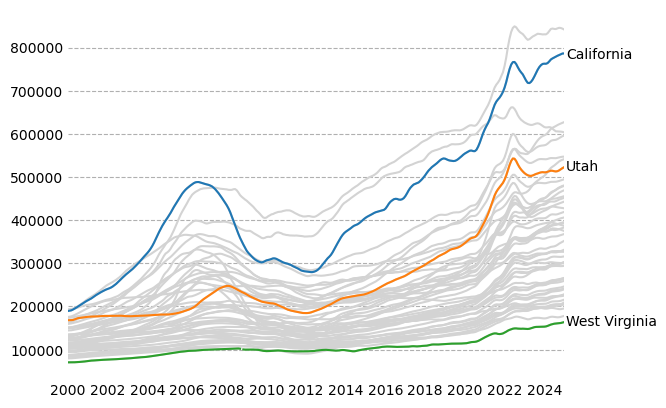

In [113]:
# Version 1 -- highlight certain states

fig, ax = plt.subplots()


zt.plot(legend=False, color="lightgray", ax = ax)


zt.plot(y="California", legend=False, ax = ax)
zt.plot(y="Utah", legend=False, ax = ax)
zt.plot(y="West Virginia", legend=False, ax = ax)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)
ax.grid(axis = "y", linestyle = "--")

# print(ax.get_xticks())
ax.set_xlim(0, 300)

for state in ["California", "Utah", "West Virginia"]:
    cur_val = zt[state].iloc[-1]
    ax.text(301, cur_val, state, va="center")

ax.set_xticks(range(0, 300, 24))

ax.set_xticklabels(range(2000, 2025, 2))
    
    
plt.show()

In [119]:
# Calculate national average

mean_vals = []

for i in range(len(zt)):
    mean_vals.append(zt.iloc[i].mean())
    
zt["National Average"] = mean_vals


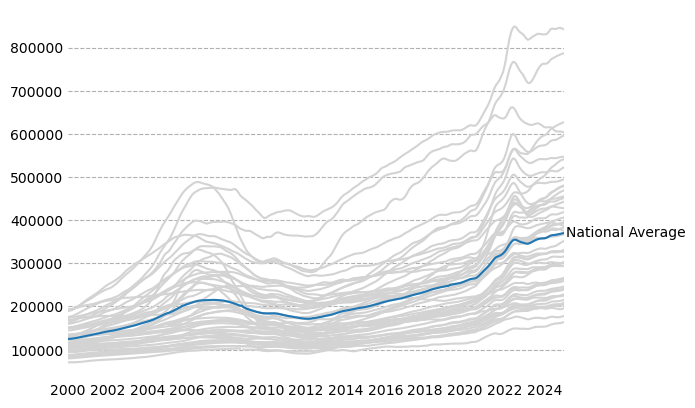

In [120]:
# Version 2 -- highlight the national average

fig, ax = plt.subplots()


zt.plot(legend=False, color="lightgray", ax = ax)

zt.plot(y="National Average", legend=False, ax = ax)

# zt.plot(y="California", legend=False, ax = ax)
# zt.plot(y="Utah", legend=False, ax = ax)
# zt.plot(y="West Virginia", legend=False, ax = ax)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)
ax.grid(axis = "y", linestyle = "--")

# print(ax.get_xticks())
ax.set_xlim(0, 300)

cur_val = zt["National Average"].iloc[-1]
ax.text(301, cur_val, "National Average", va="center")

# for state in ["California", "Utah", "West Virginia"]:
#     cur_val = zt[state].iloc[-1]
#     ax.text(301, cur_val, state, va="center")

ax.set_xticks(range(0, 300, 24))

ax.set_xticklabels(range(2000, 2025, 2))
    
    
plt.show()